In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Generate synthetic input data
def generate_synthetic_data(num_samples=1000, num_features=10):
    input_data = pd.DataFrame(np.random.rand(num_samples, num_features), columns=[f"Param_{i}" for i in range(num_features)])
    return input_data

# Generate synthetic output data
def generate_synthetic_output_data(num_samples=1000, num_features=10):
    output_data = pd.DataFrame(np.random.rand(num_samples, num_features), columns=[f"Output_{i}" for i in range(num_features)])
    return output_data

# Combine input and output data
def combine_data(input_data, output_data):
    combined_data = pd.concat([input_data, output_data], axis=1)
    return combined_data

# Add labels for normal (0) and anomalous (1) instances (for demonstration purposes)
def add_labels(combined_data):
    labels = np.random.choice([0, 1], combined_data.shape[0], p=[0.9, 0.1])
    combined_data['Label'] = labels
    return combined_data

# Train Anomaly Detection Model
def train_anomaly_detection_model(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    model = IsolationForest(contamination=0.1)
    model.fit(X_scaled)
    return model, scaler

# Detect Anomalies
def detect_anomalies(model, scaler, X):
    X_scaled = scaler.transform(X)
    anomaly_scores = model.decision_function(X_scaled)
    anomalies = X[anomaly_scores < 0]
    return anomalies

# Main function
def main():
    # Generate synthetic data
    input_data = generate_synthetic_data()
    output_data = generate_synthetic_output_data()
    combined_data = combine_data(input_data, output_data)
    combined_data = add_labels(combined_data)

    # Separate features (input parameters) and labels (normal/anomalous)
    X = combined_data.drop(columns=['Label'])
    y = combined_data['Label']

    # Train the Isolation Forest model
    model, scaler = train_anomaly_detection_model(X)

    # Detect anomalies
    anomalies = detect_anomalies(model, scaler, X)

    # Attribute anomalies to input parameters
    print("Detected Anomalies and Associated Input Parameters:")
    print(anomalies)

if __name__ == "__main__":
    main()


Detected Anomalies and Associated Input Parameters:
      Param_0   Param_1   Param_2   Param_3   Param_4   Param_5   Param_6  \
9    0.373619  0.523891  0.458947  0.397743  0.063730  0.035476  0.217454   
35   0.249847  0.977465  0.075599  0.828821  0.803463  0.115456  0.755909   
44   0.487150  0.847950  0.555109  0.843295  0.916070  0.855491  0.903528   
49   0.971506  0.517546  0.923174  0.970287  0.638183  0.802911  0.222971   
54   0.728867  0.776440  0.165720  0.754091  0.229420  0.100416  0.944693   
..        ...       ...       ...       ...       ...       ...       ...   
956  0.467387  0.959664  0.205710  0.883587  0.046438  0.833457  0.111528   
968  0.503881  0.508471  0.168583  0.926844  0.988468  0.403991  0.877893   
969  0.785114  0.067192  0.780781  0.989739  0.262879  0.812794  0.495174   
974  0.904738  0.933732  0.528457  0.410756  0.108080  0.206150  0.603131   
992  0.702878  0.027581  0.973305  0.898575  0.609201  0.576620  0.722840   

      Param_7   Param_8

In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Generate synthetic input data
def generate_synthetic_data(num_samples=1000, num_features=10):
    input_data = pd.DataFrame(np.random.rand(num_samples, num_features), columns=[f"Param_{i}" for i in range(num_features)])
    return input_data

# Generate synthetic output data
def generate_synthetic_output_data(num_samples=1000, num_features=10):
    output_data = pd.DataFrame(np.random.rand(num_samples, num_features), columns=[f"Output_{i}" for i in range(num_features)])
    return output_data

# Combine input and output data
def combine_data(input_data, output_data):
    combined_data = pd.concat([input_data, output_data], axis=1)
    return combined_data

# Add labels for normal (0) and anomalous (1) instances (for demonstration purposes)
def add_labels(combined_data):
    labels = np.random.choice([0, 1], combined_data.shape[0], p=[0.9, 0.1])
    combined_data['Label'] = labels
    return combined_data

# Train Anomaly Detection Model
def train_anomaly_detection_model(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    model = IsolationForest(contamination=0.2)  # Adjusting contamination parameter
    model.fit(X_scaled)
    return model, scaler

# Detect Anomalies
def detect_anomalies(model, scaler, X):
    X_scaled = scaler.transform(X)
    anomaly_scores = model.decision_function(X_scaled)
    anomalies = X[anomaly_scores < 0]
    return anomalies, anomaly_scores

# Introduce a single anomaly point
def introduce_anomaly(input_data):
    # Randomly select a sample index
    sample_index = np.random.randint(len(input_data))
    # Randomly select a feature to modify
    feature_index = np.random.randint(input_data.shape[1])
    # Modify the selected feature to be an outlier
    input_data.iloc[sample_index, feature_index] = np.random.uniform(10, 100)  # Introduce an outlier value

# Main function
def main():
    # Generate synthetic data
    input_data = generate_synthetic_data()
    output_data = generate_synthetic_output_data()
    combined_data = combine_data(input_data, output_data)
    combined_data = add_labels(combined_data)

    # Introduce a single anomaly point
    introduce_anomaly(input_data)

    # Separate features (input parameters) and labels (normal/anomalous)
    X = combined_data.drop(columns=['Label'])
    y = combined_data['Label']

    # Train the Isolation Forest model
    model, scaler = train_anomaly_detection_model(X)

    # Detect anomalies
    anomalies, anomaly_scores = detect_anomalies(model, scaler, X)

    # Attribute anomalies to input parameters
    print("Detected Anomalies and Associated Input Parameters:")
    print(anomalies)

    # Print anomaly scores for better understanding
    print("Anomaly Scores:")
    print(anomaly_scores)

if __name__ == "__main__":
    main()


Detected Anomalies and Associated Input Parameters:
      Param_0   Param_1   Param_2   Param_3   Param_4   Param_5   Param_6  \
4    0.618505  0.637171  0.867521  0.607513  0.629929  0.955639  0.087959   
23   0.051528  0.143883  0.973025  0.043450  0.112233  0.370276  0.514020   
28   0.841420  0.079416  0.086965  0.664293  0.073049  0.171927  0.429242   
34   0.931978  0.452632  0.607655  0.093561  0.820377  0.566907  0.145616   
38   0.645346  0.114850  0.852864  0.160029  0.047593  0.620928  0.619135   
..        ...       ...       ...       ...       ...       ...       ...   
951  0.500845  0.584086  0.709531  0.365690  0.011646  0.663590  0.544716   
959  0.156106  0.967400  0.858553  0.006368  0.975924  0.972859  0.990856   
967  0.514864  0.259170  0.569415  0.281872  0.839993  0.904481  0.230719   
982  0.870316  0.535779  0.998064  0.690232  0.168478  0.406485  0.995727   
991  0.474052  0.750486  0.016644  0.120507  0.054973  0.795602  0.026742   

      Param_7   Param_8

Detected Anomalies and Associated Input Parameters:
      Param_0   Param_1   Param_2   Param_3   Param_4   Param_5   Param_6  \
1    0.269433  0.174979  0.077705  0.602672  0.597216  0.026760  0.023951   
3    0.966983  0.790079  0.318552  0.331646  0.187686  0.783909  0.894212   
12   0.390558  0.176587  0.760337  0.942936  0.685665  0.175049  0.833466   
31   0.741915  0.174758  0.192586  0.207072  0.389676  0.793043  0.119279   
33   0.177792  0.427721  0.267397  0.290301  0.738031  0.240358  0.193914   
..        ...       ...       ...       ...       ...       ...       ...   
978  0.591462  0.906786  0.893805  0.312934  0.457809  0.997479  0.049039   
981  0.990107  0.031651  0.703082  0.462667  0.512648  0.271073  0.882756   
987  0.212526  0.246732  0.749004  0.796429  0.131574  0.083924  0.637055   
995  0.093487  0.856259  0.020522  0.219777  0.157860  0.570508  0.896833   
999  0.262828  0.153760  0.934506  0.821004  0.843708  0.117329  0.540056   

      Param_7   Param_8

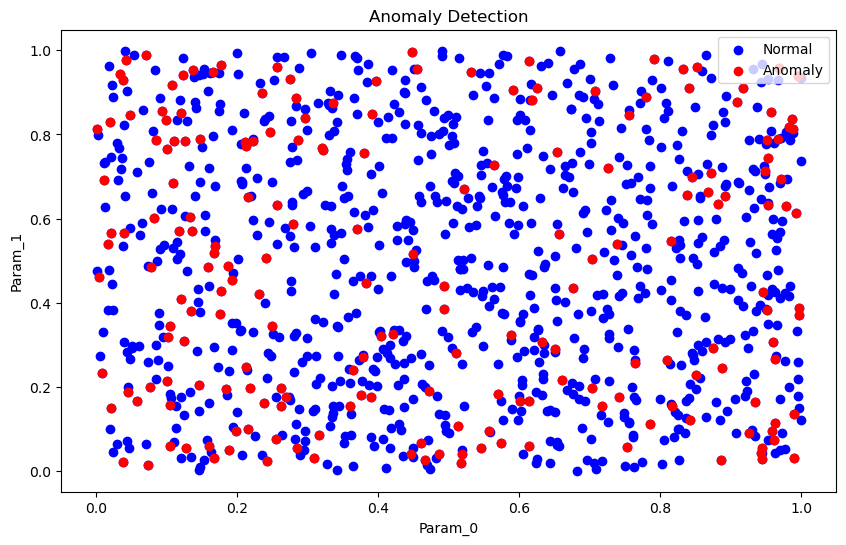

In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Generate synthetic input data
def generate_synthetic_data(num_samples=1000, num_features=10):
    input_data = pd.DataFrame(np.random.rand(num_samples, num_features), columns=[f"Param_{i}" for i in range(num_features)])
    return input_data

# Generate synthetic output data
def generate_synthetic_output_data(num_samples=1000, num_features=10):
    output_data = pd.DataFrame(np.random.rand(num_samples, num_features), columns=[f"Output_{i}" for i in range(num_features)])
    return output_data

# Combine input and output data
def combine_data(input_data, output_data):
    combined_data = pd.concat([input_data, output_data], axis=1)
    return combined_data

# Add labels for normal (0) and anomalous (1) instances (for demonstration purposes)
def add_labels(combined_data):
    labels = np.random.choice([0, 1], combined_data.shape[0], p=[0.9, 0.1])
    combined_data['Label'] = labels
    return combined_data

# Train Anomaly Detection Model
def train_anomaly_detection_model(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    model = IsolationForest(contamination=0.2)  # Adjusting contamination parameter
    model.fit(X_scaled)
    return model, scaler

# Detect Anomalies
def detect_anomalies(model, scaler, X):
    X_scaled = scaler.transform(X)
    anomaly_scores = model.decision_function(X_scaled)
    anomalies = X[anomaly_scores < 0]
    return anomalies, anomaly_scores

# Introduce a single anomaly point
def introduce_anomaly(input_data):
    # Randomly select a sample index
    sample_index = np.random.randint(len(input_data))
    # Randomly select a feature to modify
    feature_index = np.random.randint(input_data.shape[1])
    # Modify the selected feature to be an outlier
    input_data.iloc[sample_index, feature_index] = np.random.uniform(10, 100)  # Introduce an outlier value

# Main function
def main():
    # Generate synthetic data
    input_data = generate_synthetic_data()
    output_data = generate_synthetic_output_data()
    combined_data = combine_data(input_data, output_data)
    combined_data = add_labels(combined_data)

    # Introduce a single anomaly point
    introduce_anomaly(input_data)

    # Separate features (input parameters) and labels (normal/anomalous)
    X = combined_data.drop(columns=['Label'])
    y = combined_data['Label']

    # Train the Isolation Forest model
    model, scaler = train_anomaly_detection_model(X)

    # Detect anomalies
    anomalies, anomaly_scores = detect_anomalies(model, scaler, X)

    # Attribute anomalies to input parameters
    print("Detected Anomalies and Associated Input Parameters:")
    print(anomalies)

    # Print anomaly scores for better understanding
    print("Anomaly Scores:")
    print(anomaly_scores)

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c='blue', label='Normal')
    plt.scatter(anomalies.iloc[:, 0], anomalies.iloc[:, 1], c='red', label='Anomaly')
    plt.title('Anomaly Detection')
    plt.xlabel('Param_0')
    plt.ylabel('Param_1')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()


Detected Anomalies and Associated Input Parameters:
      Param_0   Param_1  Output_0  Output_1  Output_2  Output_3  Output_4  \
15  -0.067048 -1.299877  0.269003  0.883226  0.031323  0.207199  0.924561   
17  -1.517448  0.297219  0.819503  0.934716  0.842444  0.646991  0.900911   
20  -0.347480 -0.286925  0.990135  0.218513  0.794114  0.807884  0.720131   
34  -0.311511 -2.595183  0.736017  0.961269  0.384719  0.054391  0.623530   
36  -0.575799  0.870014  0.380717  0.886608  0.781413  0.837296  0.094904   
..        ...       ...       ...       ...       ...       ...       ...   
986  6.712362  5.342779  0.367629  0.455001  0.590722  0.354632  0.239059   
989  4.839333  5.106471  0.696720  0.755370  0.694504  0.757833  0.947876   
991  6.085540  6.512511  0.797662  0.606869  0.951235  0.172630  0.706002   
995  5.046684  6.083548  0.307216  0.273463  0.915843  0.156375  0.898815   
997  5.128804  6.322682  0.359049  0.817091  0.480006  0.032831  0.213836   

     Output_5  Output_6

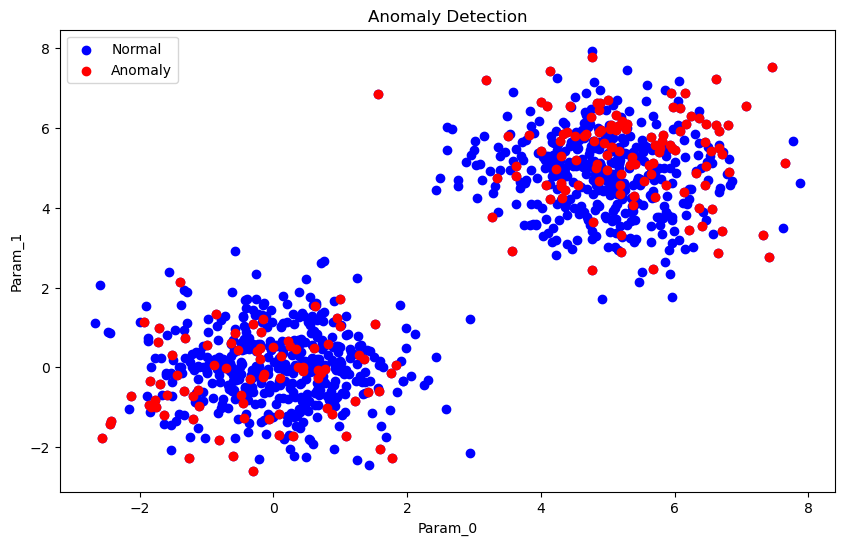

In [7]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Generate synthetic linear input data
def generate_synthetic_linear_data(num_samples=1000, num_features=2):
    # Generate normal data
    normal_data = np.random.multivariate_normal(mean=[0] * num_features, cov=np.eye(num_features), size=num_samples // 2)
    # Generate anomalous data with larger means
    anomalous_data = np.random.multivariate_normal(mean=[5] * num_features, cov=np.eye(num_features), size=num_samples // 2)
    # Combine normal and anomalous data
    input_data = np.vstack([normal_data, anomalous_data])
    # Create DataFrame
    input_df = pd.DataFrame(input_data, columns=[f"Param_{i}" for i in range(num_features)])
    return input_df

# Combine input and output data
def combine_data(input_data, output_data):
    combined_data = pd.concat([input_data, output_data], axis=1)
    return combined_data

# Add labels for normal (0) and anomalous (1) instances (for demonstration purposes)
def add_labels(combined_data):
    labels = np.zeros(combined_data.shape[0])
    labels[combined_data.index >= len(combined_data) // 2] = 1
    combined_data['Label'] = labels
    return combined_data

# Train Anomaly Detection Model
def train_anomaly_detection_model(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    model = IsolationForest(contamination=0.2)  # Adjusting contamination parameter
    model.fit(X_scaled)
    return model, scaler

# Detect Anomalies
def detect_anomalies(model, scaler, X):
    X_scaled = scaler.transform(X)
    anomaly_scores = model.decision_function(X_scaled)
    anomalies = X[anomaly_scores < 0]
    return anomalies, anomaly_scores

# Main function
def main():
    # Generate synthetic linear data
    input_data = generate_synthetic_linear_data()
    output_data = generate_synthetic_output_data()
    combined_data = combine_data(input_data, output_data)
    combined_data = add_labels(combined_data)

    # Separate features (input parameters) and labels (normal/anomalous)
    X = combined_data.drop(columns=['Label'])
    y = combined_data['Label']

    # Train the Isolation Forest model
    model, scaler = train_anomaly_detection_model(X)

    # Detect anomalies
    anomalies, anomaly_scores = detect_anomalies(model, scaler, X)

    # Attribute anomalies to input parameters
    print("Detected Anomalies and Associated Input Parameters:")
    print(anomalies)

    # Print anomaly scores for better understanding
    print("Anomaly Scores:")
    print(anomaly_scores)

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c='blue', label='Normal')
    plt.scatter(anomalies.iloc[:, 0], anomalies.iloc[:, 1], c='red', label='Anomaly')
    plt.title('Anomaly Detection')
    plt.xlabel('Param_0')
    plt.ylabel('Param_1')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()


Detected Anomalies and Associated Input Parameters:
Anomaly at Param_3 with values: [0.02004008 0.         0.75521642 0.89889631 0.49347171 0.59772141
 0.76103673 0.3345103  0.8967086  0.04603444 0.14706828 0.28893039]
Anomaly at Param_2 with values: [0.04008016 0.         0.98320534 0.20382382 0.82236021 0.95009918
 0.26084998 0.54521939 0.35039937 0.89448954 0.16927938 0.51213148]
Anomaly at Param_8 with values: [0.08016032 0.         0.51693427 0.02257237 0.07674248 0.1303302
 0.13218285 0.49263346 0.56951599 0.13749038 0.51791763 0.15312111]
Anomaly at Param_3 with values: [0.14028056 0.         0.11511384 0.5515752  0.07231511 0.19207045
 0.00320195 0.20165888 0.31294055 0.49023607 0.09940901 0.02841908]
Anomaly at Param_6 with values: [0.16032064 0.         0.93430153 0.71161879 0.30969767 0.83521417
 0.96042133 0.74264656 0.6720086  0.788403   0.05419516 0.06761205]
Anomaly at Param_7 with values: [3.00601202e-01 0.00000000e+00 1.20546894e-01 8.64788133e-01
 5.54123204e-01 2.613

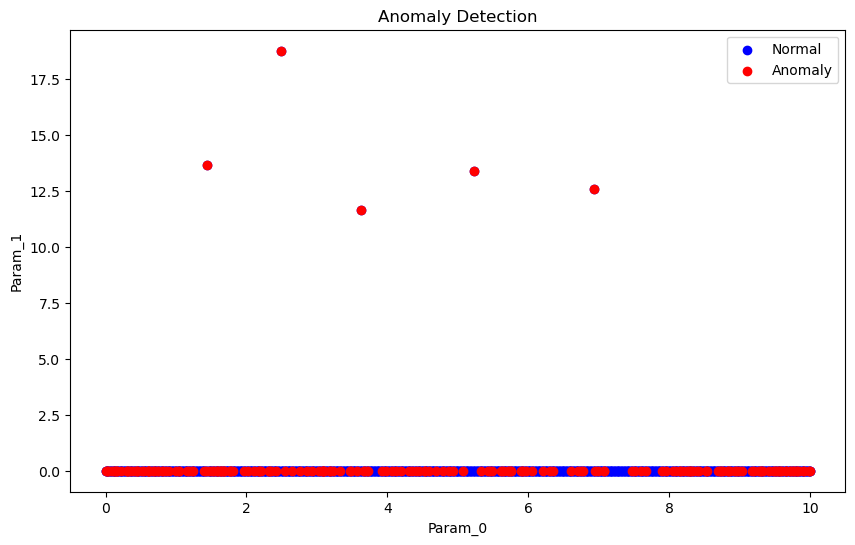

In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Generate synthetic linear input data with anomalies as peaks
def generate_synthetic_data(num_samples=1000, num_features=2, num_anomalies=5):
    # Generate normal data along a straight line
    normal_data = np.zeros((num_samples // 2, num_features))
    normal_data[:, 0] = np.linspace(0, 10, num_samples // 2)
    # Generate anomalous data with peaks
    peak_indices = np.random.choice(np.arange(num_samples // 2), num_anomalies, replace=False)
    anomalous_data = normal_data.copy()
    anomalous_data[peak_indices, 1] = np.random.uniform(10, 20, num_anomalies)  # Introduce peaks
    # Combine normal and anomalous data
    input_data = np.vstack([normal_data, anomalous_data])
    # Create DataFrame
    input_df = pd.DataFrame(input_data, columns=[f"Param_{i}" for i in range(num_features)])
    return input_df

# Combine input and output data
def combine_data(input_data, output_data):
    combined_data = pd.concat([input_data, output_data], axis=1)
    return combined_data

# Add labels for normal (0) and anomalous (1) instances (for demonstration purposes)
def add_labels(combined_data):
    labels = np.zeros(combined_data.shape[0])
    labels[combined_data.index >= len(combined_data) // 2] = 1
    combined_data['Label'] = labels
    return combined_data

# Train Anomaly Detection Model
def train_anomaly_detection_model(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    model = IsolationForest(contamination=0.2)  # Adjusting contamination parameter
    model.fit(X_scaled)
    return model, scaler

# Detect Anomalies
def detect_anomalies(model, scaler, X):
    X_scaled = scaler.transform(X)
    anomaly_scores = model.decision_function(X_scaled)
    anomalies = X[anomaly_scores < 0]
    return anomalies, anomaly_scores

# Attribute Anomalies to Input Parameters
def attribute_anomalies_to_input_params(anomalies, num_features):
    param_cols = [f"Param_{i}" for i in range(num_features)]
    anomalous_params = []
    for index, row in anomalies.iterrows():
        peak_param = param_cols[np.argmax(row.values)]
        anomalous_params.append(peak_param)
    return anomalous_params

# Main function
def main():
    # Generate synthetic data
    num_anomalies = 5  # Number of anomalies (peaks)
    input_data = generate_synthetic_data(num_anomalies=num_anomalies)
    output_data = generate_synthetic_output_data()
    combined_data = combine_data(input_data, output_data)
    combined_data = add_labels(combined_data)

    # Separate features (input parameters) and labels (normal/anomalous)
    X = combined_data.drop(columns=['Label'])
    y = combined_data['Label']

    # Train the Isolation Forest model
    model, scaler = train_anomaly_detection_model(X)

    # Detect anomalies
    anomalies, anomaly_scores = detect_anomalies(model, scaler, X)

    # Attribute anomalies to input parameters
    anomalous_params = attribute_anomalies_to_input_params(anomalies, X.shape[1])

    # Print detected anomalies and associated input parameters
    print("Detected Anomalies and Associated Input Parameters:")
    for anomaly, param in zip(anomalies.values, anomalous_params):
        print(f"Anomaly at {param} with values: {anomaly}")

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c='blue', label='Normal')
    plt.scatter(anomalies.iloc[:, 0], anomalies.iloc[:, 1], c='red', label='Anomaly')
    plt.title('Anomaly Detection')
    plt.xlabel('Param_0')
    plt.ylabel('Param_1')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()


Detected Anomalies and Associated Input Parameters:
Anomaly at Param_7 with values: [0.02004008 0.         0.3238764  0.18156293 0.66987191 0.12317434
 0.57397965 0.95217758 0.3799149  0.22035342 0.8026723  0.60881978]
Anomaly at Param_2 with values: [0.04008016 0.         0.92686203 0.66156875 0.3305858  0.21445464
 0.80895926 0.18500334 0.18189087 0.78638586 0.78150899 0.27676128]
Anomaly at Param_7 with values: [0.08016032 0.         0.6420195  0.13339393 0.22740177 0.5683864
 0.02756397 0.95604609 0.77598898 0.79193111 0.72736295 0.49598609]
Anomaly at Param_8 with values: [0.1002004  0.         0.18764323 0.42442291 0.41877326 0.22506445
 0.75055237 0.02370974 0.84027283 0.72714939 0.15881036 0.83749224]
Anomaly at Param_6 with values: [0.12024048 0.         0.3338712  0.81986528 0.55530161 0.57932602
 0.90809422 0.11371098 0.40035791 0.02785534 0.52792231 0.62132032]
Anomaly at Param_5 with values: [0.2004008  0.         0.39990171 0.00821683 0.49250724 0.98722604
 0.31285368 0.2

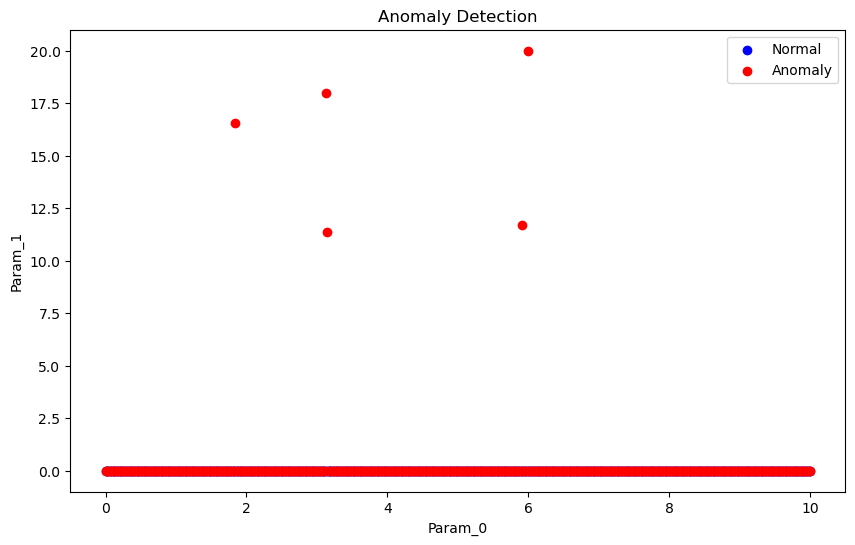

In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Generate synthetic linear input data with anomalies as peaks
def generate_synthetic_data(num_samples=1000, num_features=2, num_anomalies=5):
    # Generate normal data along a straight line
    normal_data = np.zeros((num_samples // 2, num_features))
    normal_data[:, 0] = np.linspace(0, 10, num_samples // 2)
    # Generate anomalous data with peaks
    peak_indices = np.random.choice(np.arange(10, num_samples // 2 - 10), num_anomalies, replace=False)
    anomalous_data = normal_data.copy()
    for idx in peak_indices:
        peak_height = np.random.uniform(10, 20)
        anomalous_data[idx, 1] = peak_height  # Introduce peaks
    # Combine normal and anomalous data
    input_data = np.vstack([normal_data, anomalous_data])
    # Create DataFrame
    input_df = pd.DataFrame(input_data, columns=[f"Param_{i}" for i in range(num_features)])
    return input_df

# Combine input and output data
def combine_data(input_data, output_data):
    combined_data = pd.concat([input_data, output_data], axis=1)
    return combined_data

# Add labels for normal (0) and anomalous (1) instances (for demonstration purposes)
def add_labels(combined_data):
    labels = np.zeros(combined_data.shape[0])
    labels[combined_data.index >= len(combined_data) // 2] = 1
    combined_data['Label'] = labels
    return combined_data

# Train Anomaly Detection Model
def train_anomaly_detection_model(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    model = IsolationForest(contamination=0.2)  # Adjusting contamination parameter
    model.fit(X_scaled)
    return model, scaler

# Detect Anomalies
def detect_anomalies(model, scaler, X):
    X_scaled = scaler.transform(X)
    anomaly_scores = model.decision_function(X_scaled)
    anomalies = X[anomaly_scores < 0]
    return anomalies, anomaly_scores

# Attribute Anomalies to Input Parameters
def attribute_anomalies_to_input_params(anomalies, num_features):
    param_cols = [f"Param_{i}" for i in range(num_features)]
    anomalous_params = []
    for index, row in anomalies.iterrows():
        peak_param = param_cols[np.argmax(row.values)]
        anomalous_params.append(peak_param)
    return anomalous_params

# Main function
def main():
    # Generate synthetic data
    num_anomalies = 5  # Number of anomalies (peaks)
    input_data = generate_synthetic_data(num_anomalies=num_anomalies)
    output_data = generate_synthetic_output_data()
    combined_data = combine_data(input_data, output_data)
    combined_data = add_labels(combined_data)

    # Separate features (input parameters) and labels (normal/anomalous)
    X = combined_data.drop(columns=['Label'])
    y = combined_data['Label']

    # Train the Isolation Forest model
    model, scaler = train_anomaly_detection_model(X)

    # Detect anomalies
    anomalies, anomaly_scores = detect_anomalies(model, scaler, X)

    # Attribute anomalies to input parameters
    anomalous_params = attribute_anomalies_to_input_params(anomalies, X.shape[1])

    # Print detected anomalies and associated input parameters
    print("Detected Anomalies and Associated Input Parameters:")
    for anomaly, param in zip(anomalies.values, anomalous_params):
        print(f"Anomaly at {param} with values: {anomaly}")

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.scatter(X.iloc[:500, 0], X.iloc[:500, 1], c='blue', label='Normal')
    plt.scatter(X.iloc[500:, 0], X.iloc[500:, 1], c='red', label='Anomaly')
    plt.title('Anomaly Detection')
    plt.xlabel('Param_0')
    plt.ylabel('Param_1')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()


Detected Anomalies and Associated Input Parameters:
Anomaly at Param_11 with values: [0.08016032 0.         0.24533028 0.01371245 0.10461545 0.38214508
 0.26069717 0.33266187 0.26009608 0.99300222 0.93585304 0.99502947]
Anomaly at Param_6 with values: [0.2004008  0.         0.10692244 0.90183682 0.52495503 0.74853319
 0.95363414 0.11718789 0.769375   0.08658057 0.87677584 0.47497353]
Anomaly at Param_7 with values: [0.36072144 0.         0.12936808 0.01201644 0.90258305 0.98702518
 0.73564935 0.99935081 0.09741268 0.52738777 0.54049758 0.41177667]
Anomaly at Param_10 with values: [0.4008016  0.         0.92014997 0.72089045 0.99558813 0.85642871
 0.03663851 0.64836888 0.77694051 0.20644792 0.99949117 0.09861882]
Anomaly at Param_5 with values: [0.70140281 0.         0.86631132 0.85290488 0.81639081 0.9522071
 0.69226405 0.94879198 0.63397241 0.71276207 0.83071722 0.07154633]
Anomaly at Param_0 with values: [1.58316633 0.         0.80869085 0.88861827 0.13212903 0.91479392
 0.134821   0

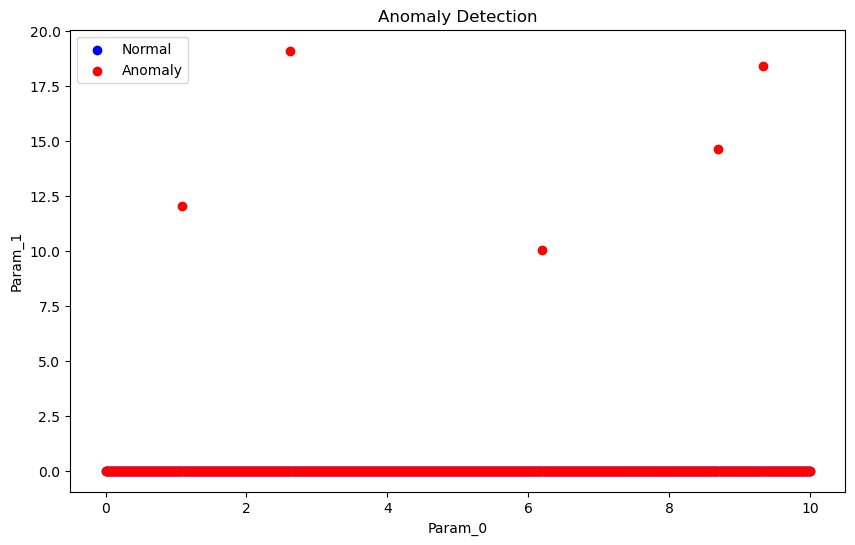

In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Generate synthetic linear input data with anomalies as peaks
def generate_synthetic_data(num_samples=1000, num_features=2, num_anomalies=5):
    # Generate normal data along a straight line
    normal_data = np.zeros((num_samples // 2, num_features))
    normal_data[:, 0] = np.linspace(0, 10, num_samples // 2)
    # Generate anomalous data with peaks
    peak_indices = np.random.choice(np.arange(10, num_samples // 2 - 10), num_anomalies, replace=False)
    anomalous_data = normal_data.copy()
    for idx in peak_indices:
        peak_height = np.random.uniform(10, 20)
        anomalous_data[idx, 1] = peak_height  # Introduce peaks
    # Combine normal and anomalous data
    input_data = np.vstack([normal_data, anomalous_data])
    # Create DataFrame
    input_df = pd.DataFrame(input_data, columns=[f"Param_{i}" for i in range(num_features)])
    return input_df

# Combine input and output data
def combine_data(input_data, output_data):
    combined_data = pd.concat([input_data, output_data], axis=1)
    return combined_data

# Add labels for normal (0) and anomalous (1) instances (for demonstration purposes)
def add_labels(combined_data):
    labels = np.zeros(combined_data.shape[0])
    labels[combined_data.index >= len(combined_data) // 2] = 1
    combined_data['Label'] = labels
    return combined_data

# Train Anomaly Detection Model
def train_anomaly_detection_model(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    model = IsolationForest(contamination=0.05)  # Adjusting contamination parameter
    model.fit(X_scaled)
    return model, scaler

# Detect Anomalies
def detect_anomalies(model, scaler, X):
    X_scaled = scaler.transform(X)
    anomaly_scores = model.decision_function(X_scaled)
    anomalies = X[anomaly_scores < 0]
    return anomalies, anomaly_scores

# Attribute Anomalies to Input Parameters
def attribute_anomalies_to_input_params(anomalies, num_features):
    param_cols = [f"Param_{i}" for i in range(num_features)]
    anomalous_params = []
    for index, row in anomalies.iterrows():
        peak_param = param_cols[np.argmax(row.values)]
        anomalous_params.append(peak_param)
    return anomalous_params

# Main function
def main():
    # Generate synthetic data
    num_anomalies = 5  # Number of anomalies (peaks)
    input_data = generate_synthetic_data(num_anomalies=num_anomalies)
    output_data = generate_synthetic_output_data()
    combined_data = combine_data(input_data, output_data)
    combined_data = add_labels(combined_data)

    # Separate features (input parameters) and labels (normal/anomalous)
    X = combined_data.drop(columns=['Label'])
    y = combined_data['Label']

    # Train the Isolation Forest model
    model, scaler = train_anomaly_detection_model(X)

    # Detect anomalies
    anomalies, anomaly_scores = detect_anomalies(model, scaler, X)

    # Attribute anomalies to input parameters
    anomalous_params = attribute_anomalies_to_input_params(anomalies, X.shape[1])

    # Print detected anomalies and associated input parameters
    print("Detected Anomalies and Associated Input Parameters:")
    for anomaly, param in zip(anomalies.values, anomalous_params):
        print(f"Anomaly at {param} with values: {anomaly}")

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.scatter(X.iloc[:500, 0], X.iloc[:500, 1], c='blue', label='Normal')
    plt.scatter(X.iloc[500:, 0], X.iloc[500:, 1], c='red', label='Anomaly')
    plt.title('Anomaly Detection')
    plt.xlabel('Param_0')
    plt.ylabel('Param_1')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()


Detected Anomalies and Associated Input Parameters:
Anomaly at Param_7 with values: [0.         0.         0.1258592  0.48566718 0.50426056 0.13195439
 0.31759915 0.99781182 0.82330069 0.84365967 0.06440306 0.17920679]
Anomaly at Param_6 with values: [0.42084168 0.         0.03150008 0.46896658 0.62434219 0.17303498
 0.98835703 0.30460749 0.1245096  0.01524144 0.36846873 0.15269691]
Anomaly at Param_9 with values: [0.74148297 0.         0.31761901 0.76474006 0.87973039 0.48154747
 0.03429154 0.10507266 0.07756108 0.93008292 0.21458753 0.04324451]
Anomaly at Param_11 with values: [0.88176353 0.         0.86165108 0.24201512 0.61459291 0.00877277
 0.18243698 0.86896314 0.15679643 0.78693731 0.07589981 0.90943055]
Anomaly at Param_0 with values: [2.70541082 0.         0.9109371  0.69227682 0.02158502 0.01865652
 0.11020885 0.41707361 0.96764514 0.16654567 0.72442359 0.08083575]
Anomaly at Param_0 with values: [2.84569138e+00 0.00000000e+00 7.74750701e-01 1.68744950e-01
 1.72995395e-01 2.3

ValueError: too many values to unpack (expected 2)

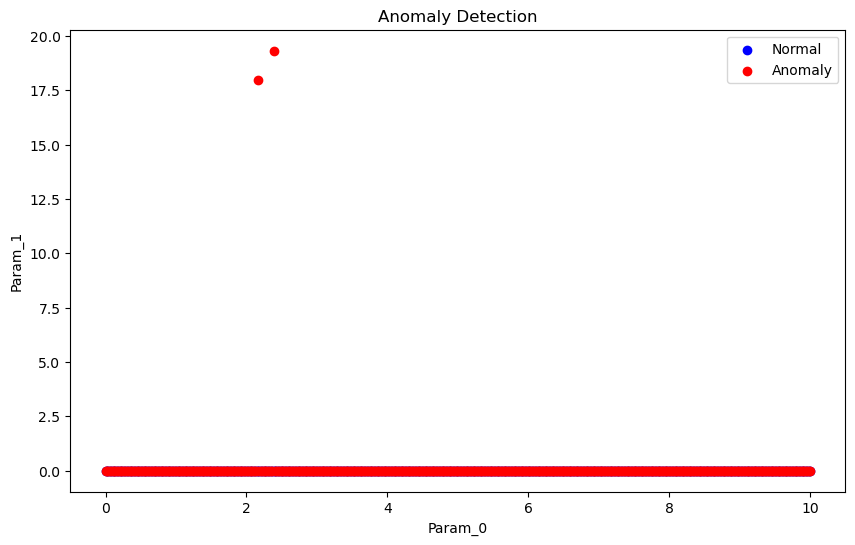

In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Generate synthetic linear input data with anomalies as peaks
def generate_synthetic_data(num_samples=1000, num_features=2, num_anomalies=2):
    # Generate normal data along a straight line
    normal_data = np.zeros((num_samples // 2, num_features))
    normal_data[:, 0] = np.linspace(0, 10, num_samples // 2)
    # Generate anomalous data with peaks
    peak_indices = np.random.choice(np.arange(10, num_samples // 2 - 10), num_anomalies, replace=False)
    anomalous_data = normal_data.copy()
    for idx in peak_indices:
        peak_height = np.random.uniform(10, 20)
        anomalous_data[idx, 1] = peak_height  # Introduce peaks
    # Combine normal and anomalous data
    input_data = np.vstack([normal_data, anomalous_data])
    # Create DataFrame
    input_df = pd.DataFrame(input_data, columns=[f"Param_{i}" for i in range(num_features)])
    return input_df

# Combine input and output data
def combine_data(input_data, output_data):
    combined_data = pd.concat([input_data, output_data], axis=1)
    return combined_data

# Add labels for normal (0) and anomalous (1) instances (for demonstration purposes)
def add_labels(combined_data):
    labels = np.zeros(combined_data.shape[0])
    labels[combined_data.index >= len(combined_data) // 2] = 1
    combined_data['Label'] = labels
    return combined_data

# Train Anomaly Detection Model
def train_anomaly_detection_model(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    model = IsolationForest(contamination=0.05)  # Adjusting contamination parameter
    model.fit(X_scaled)
    return model, scaler

# Detect Anomalies
def detect_anomalies(model, scaler, X):
    X_scaled = scaler.transform(X)
    anomaly_scores = model.decision_function(X_scaled)
    anomalies = X[anomaly_scores < 0]
    return anomalies, anomaly_scores

# Attribute Anomalies to Input Parameters
def attribute_anomalies_to_input_params(anomalies, num_features):
    param_cols = [f"Param_{i}" for i in range(num_features)]
    anomalous_params = []
    for index, row in anomalies.iterrows():
        peak_param = param_cols[np.argmax(row.values)]
        anomalous_params.append(peak_param)
    return anomalous_params

# Main function
def main():
    # Generate synthetic data
    num_anomalies = 2  # Number of anomalies (peaks)
    input_data = generate_synthetic_data(num_anomalies=num_anomalies)
    output_data = generate_synthetic_output_data()
    combined_data = combine_data(input_data, output_data)
    combined_data = add_labels(combined_data)

    # Separate features (input parameters) and labels (normal/anomalous)
    X = combined_data.drop(columns=['Label'])
    y = combined_data['Label']

    # Train the Isolation Forest model
    model, scaler = train_anomaly_detection_model(X)

    # Detect anomalies
    anomalies, anomaly_scores = detect_anomalies(model, scaler, X)

    # Attribute anomalies to input parameters
    anomalous_params = attribute_anomalies_to_input_params(anomalies, X.shape[1])

    # Print detected anomalies and associated input parameters
    print("Detected Anomalies and Associated Input Parameters:")
    for anomaly, param in zip(anomalies.values, anomalous_params):
        print(f"Anomaly at {param} with values: {anomaly}")

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.scatter(X.iloc[:500, 0], X.iloc[:500, 1], c='blue', label='Normal')
    plt.scatter(X.iloc[500:, 0], X.iloc[500:, 1], c='red', label='Anomaly')
    plt.title('Anomaly Detection')
    plt.xlabel('Param_0')
    plt.ylabel('Param_1')
    plt.legend()

    # Highlight anomalies
    for idx, (x, y) in enumerate(anomalies.values):
        plt.text(x, y, f'Anomaly {idx + 1}', fontsize=10, color='black', ha='center', va='bottom')

    plt.show()

if __name__ == "__main__":
    main()


In [12]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Function to read .inp files
def read_inp_file(file_path):
    # Read .inp file into DataFrame
    data = pd.read_csv(file_path, delimiter=' ', header=None)  # Assuming space-separated values
    return data

# Function to preprocess data
def preprocess_data(data):
    # Implement data preprocessing steps as needed
    # For demonstration, let's assume we are dropping any rows with missing values
    data.dropna(inplace=True)
    return data

# Combine input and output data
def combine_data(input_data, output_data):
    combined_data = pd.concat([input_data, output_data], axis=1)
    return combined_data

# Train Anomaly Detection Model
def train_anomaly_detection_model(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    model = IsolationForest(contamination=0.05)  # Adjusting contamination parameter
    model.fit(X_scaled)
    return model, scaler

# Detect Anomalies
def detect_anomalies(model, scaler, X):
    X_scaled = scaler.transform(X)
    anomaly_scores = model.decision_function(X_scaled)
    anomalies = X[anomaly_scores < 0]
    return anomalies, anomaly_scores

# Main function
def main():
    # Read input test case file (.inp)
    input_test_case_file = read_inp_file("input_test_case_file.inp")

    # Read reference file (if available)
    reference_file = read_inp_file("reference_file.inp")

    # Preprocess data
    input_data = preprocess_data(input_test_case_file)
    reference_data = preprocess_data(reference_file) if reference_file is not None else None

    # Combine data
    combined_data = input_data if reference_data is None else combine_data(input_data, reference_data)

    # Separate features (input parameters) and labels (output data, if available)
    X = combined_data.drop(columns=['Label']) if 'Label' in combined_data.columns else combined_data

    # Train the Isolation Forest model
    model, scaler = train_anomaly_detection_model(X)

    # Detect anomalies
    anomalies, anomaly_scores = detect_anomalies(model, scaler, X)

    # Visualize results
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c='blue', label='Normal')
    if not anomalies.empty:
        plt.scatter(anomalies.iloc[:, 0], anomalies.iloc[:, 1], c='red', label='Anomaly')
    plt.title('Anomaly Detection')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()


FileNotFoundError: [Errno 2] No such file or directory: 'input_test_case_file.inp'

In [13]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Function to generate random synthetic data
def generate_random_data(num_samples, num_features):
    return pd.DataFrame(np.random.rand(num_samples, num_features), columns=[f"Param_{i}" for i in range(num_features)])

# Function to introduce anomalies in the input test case data
def introduce_anomalies(input_data, num_anomalies):
    anomaly_indices = np.random.choice(input_data.index, num_anomalies, replace=False)
    input_data.loc[anomaly_indices] += 5  # Add anomaly value to selected rows
    return input_data

# Function to train anomaly detection model
def train_anomaly_detection_model(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    model = IsolationForest(contamination=0.05)  # Adjusting contamination parameter
    model.fit(X_scaled)
    return model, scaler

# Function to detect anomalies
def detect_anomalies(model, scaler, X):
    X_scaled = scaler.transform(X)
    anomaly_scores = model.decision_function(X_scaled)
    anomalies = X[anomaly_scores < 0]
    return anomalies, anomaly_scores

# Function to find root cause
def find_root_cause(anomalies, reference_data):
    root_causes = []
    for idx, anomaly in anomalies.iterrows():
        reference_diff = reference_data - anomaly.values.reshape(1, -1)
        param_responsible = reference_diff.abs().sum(axis=1).idxmin()
        root_causes.append(param_responsible)
    return pd.DataFrame(root_causes, columns=['Param_Responsible'])

# Main function
def main():
    # Generate random synthetic data for input test case and reference
    input_test_case_data = generate_random_data(100, 5)  # 100 samples, 5 features
    reference_data = generate_random_data(100, 5)  # 100 samples, 5 features

    # Introduce anomalies in the input test case data
    input_test_case_data = introduce_anomalies(input_test_case_data, 2)  # Introduce 2 anomalies

    # Train the Isolation Forest model
    model, scaler = train_anomaly_detection_model(reference_data)

    # Detect anomalies
    anomalies, _ = detect_anomalies(model, scaler, input_test_case_data)

    # Find root cause
    root_causes = find_root_cause(anomalies, reference_data)

    # Print anomalies and root causes
    print("Detected Anomalies and Associated Root Causes:")
    for idx, anomaly in anomalies.iterrows():
        param_responsible = root_causes.iloc[idx]['Param_Responsible']
        print(f"Anomaly {idx + 1}:")
        print("Anomaly values:", anomaly.values)
        print("Parameter responsible for anomaly:", param_responsible)
        print()

    # Visualize results
    plt.scatter(reference_data.iloc[:, 0], reference_data.iloc[:, 1], c='blue', label='Reference Data')
    plt.scatter(input_test_case_data.iloc[:, 0], input_test_case_data.iloc[:, 1], c='green', label='Input Test Case Data')
    if not anomalies.empty:
        plt.scatter(anomalies.iloc[:, 0], anomalies.iloc[:, 1], c='red', label='Anomaly')
    plt.title('Anomaly Detection')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()


Detected Anomalies and Associated Root Causes:
Anomaly 5:
Anomaly values: [0.84640619 0.94830113 0.20421459 0.99795038 0.54657483]
Parameter responsible for anomaly: 29

Anomaly 8:
Anomaly values: [0.35736883 0.94066562 0.16798572 0.13615151 0.0331756 ]
Parameter responsible for anomaly: 8

Anomaly 10:
Anomaly values: [0.79363751 0.13994504 0.0641665  0.93932776 0.86354884]
Parameter responsible for anomaly: 61

Anomaly 11:
Anomaly values: [0.93803381 0.33019673 0.64103234 0.93917272 0.81074354]
Parameter responsible for anomaly: 25

Anomaly 15:
Anomaly values: [0.90452094 0.32802782 0.99625152 0.99374145 0.44690197]
Parameter responsible for anomaly: 70



IndexError: single positional indexer is out-of-bounds

In [14]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Function to generate random synthetic data
def generate_random_data(num_samples, num_features):
    return pd.DataFrame(np.random.rand(num_samples, num_features), columns=[f"Param_{i}" for i in range(num_features)])

# Function to introduce anomalies in the input test case data
def introduce_anomalies(input_data, num_anomalies):
    anomaly_indices = np.random.choice(input_data.index, num_anomalies, replace=False)
    input_data.loc[anomaly_indices] += 5  # Add anomaly value to selected rows
    return input_data

# Function to train anomaly detection model
def train_anomaly_detection_model(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    model = IsolationForest(contamination=0.05)  # Adjusting contamination parameter
    model.fit(X_scaled)
    return model, scaler

# Function to detect anomalies
def detect_anomalies(model, scaler, X):
    X_scaled = scaler.transform(X)
    anomaly_scores = model.decision_function(X_scaled)
    anomalies = X[anomaly_scores < 0]
    return anomalies, anomaly_scores

# Function to find root cause
def find_root_cause(anomalies, reference_data):
    root_causes = []
    for idx, anomaly in anomalies.iterrows():
        reference_diff = reference_data - anomaly.values.reshape(1, -1)
        if not reference_diff.empty:
            param_responsible = reference_diff.abs().sum(axis=1).idxmin()
            root_causes.append(param_responsible)
    return pd.DataFrame(root_causes, columns=['Param_Responsible'])

# Main function
def main():
    # Generate random synthetic data for input test case and reference
    input_test_case_data = generate_random_data(100, 5)  # 100 samples, 5 features
    reference_data = generate_random_data(100, 5)  # 100 samples, 5 features

    # Introduce anomalies in the input test case data
    input_test_case_data = introduce_anomalies(input_test_case_data, 2)  # Introduce 2 anomalies

    # Train the Isolation Forest model
    model, scaler = train_anomaly_detection_model(reference_data)

    # Detect anomalies
    anomalies, _ = detect_anomalies(model, scaler, input_test_case_data)

    # Find root cause
    if not anomalies.empty:
        root_causes = find_root_cause(anomalies, reference_data)

        # Print anomalies and root causes
        print("Detected Anomalies and Associated Root Causes:")
        for idx, anomaly in anomalies.iterrows():
            param_responsible = root_causes.iloc[idx]['Param_Responsible']
            print(f"Anomaly {idx + 1}:")
            print("Anomaly values:", anomaly.values)
            print("Parameter responsible for anomaly:", param_responsible)
            print()

    # Visualize results
    plt.scatter(reference_data.iloc[:, 0], reference_data.iloc[:, 1], c='blue', label='Reference Data')
    plt.scatter(input_test_case_data.iloc[:, 0], input_test_case_data.iloc[:, 1], c='green', label='Input Test Case Data')
    if not anomalies.empty:
        plt.scatter(anomalies.iloc[:, 0], anomalies.iloc[:, 1], c='red', label='Anomaly')
    plt.title('Anomaly Detection')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()


Detected Anomalies and Associated Root Causes:
Anomaly 6:
Anomaly values: [0.92946386 0.73734147 0.76529037 0.02973688 0.98755829]
Parameter responsible for anomaly: 22

Anomaly 9:
Anomaly values: [0.92678443 0.07306134 0.91156482 0.00754676 0.06200752]
Parameter responsible for anomaly: 15

Anomaly 15:
Anomaly values: [0.29151497 0.03923192 0.03997434 0.92882721 0.86726372]
Parameter responsible for anomaly: 70

Anomaly 19:
Anomaly values: [0.61077139 0.96361843 0.52038347 0.4468301  0.97225776]
Parameter responsible for anomaly: 18



IndexError: single positional indexer is out-of-bounds

Detected Anomalies and Associated Root Causes:
Anomaly 3:
Anomaly values: [6.70272935e-01 5.04429372e-02 2.87087548e-01 7.33152797e-05
 5.24137150e-02]
Parameter responsible for anomaly: 61



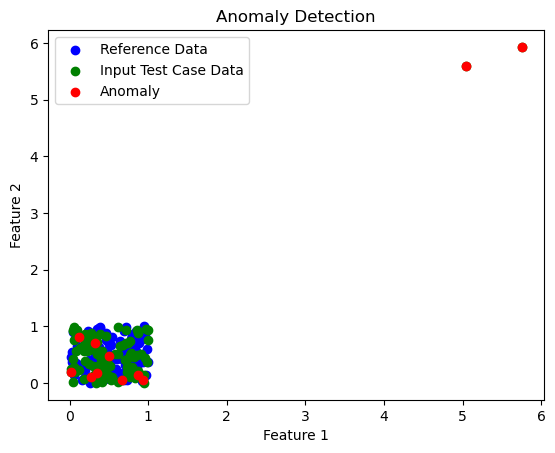

In [15]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Function to generate random synthetic data
def generate_random_data(num_samples, num_features):
    return pd.DataFrame(np.random.rand(num_samples, num_features), columns=[f"Param_{i}" for i in range(num_features)])

# Function to introduce anomalies in the input test case data
def introduce_anomalies(input_data, num_anomalies):
    anomaly_indices = np.random.choice(input_data.index, num_anomalies, replace=False)
    input_data.loc[anomaly_indices] += 5  # Add anomaly value to selected rows
    return input_data

# Function to train anomaly detection model
def train_anomaly_detection_model(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    model = IsolationForest(contamination=0.05)  # Adjusting contamination parameter
    model.fit(X_scaled)
    return model, scaler

# Function to detect anomalies
def detect_anomalies(model, scaler, X):
    X_scaled = scaler.transform(X)
    anomaly_scores = model.decision_function(X_scaled)
    anomalies = X[anomaly_scores < 0]
    return anomalies, anomaly_scores

# Function to find root cause
def find_root_cause(anomalies, reference_data):
    root_causes = []
    for idx, anomaly in anomalies.iterrows():
        reference_diff = reference_data - anomaly.values.reshape(1, -1)
        if not reference_diff.empty:
            param_responsible = reference_diff.abs().sum(axis=1).idxmin()
            root_causes.append(param_responsible)
    return pd.DataFrame(root_causes, columns=['Param_Responsible'])

# Main function
def main():
    # Generate random synthetic data for input test case and reference
    input_test_case_data = generate_random_data(100, 5)  # 100 samples, 5 features
    reference_data = generate_random_data(100, 5)  # 100 samples, 5 features

    # Introduce anomalies in the input test case data
    input_test_case_data = introduce_anomalies(input_test_case_data, 2)  # Introduce 2 anomalies

    # Train the Isolation Forest model
    model, scaler = train_anomaly_detection_model(reference_data)

    # Detect anomalies
    anomalies, _ = detect_anomalies(model, scaler, input_test_case_data)

    # Find root cause
    if not anomalies.empty:
        root_causes = find_root_cause(anomalies, reference_data)

        # Print anomalies and root causes
        print("Detected Anomalies and Associated Root Causes:")
        for idx, anomaly in anomalies.iterrows():
            if idx < len(root_causes):  # Check if index is within bounds
                param_responsible = root_causes.iloc[idx]['Param_Responsible']
                print(f"Anomaly {idx + 1}:")
                print("Anomaly values:", anomaly.values)
                print("Parameter responsible for anomaly:", param_responsible)
                print()

    # Visualize results
    plt.scatter(reference_data.iloc[:, 0], reference_data.iloc[:, 1], c='blue', label='Reference Data')
    plt.scatter(input_test_case_data.iloc[:, 0], input_test_case_data.iloc[:, 1], c='green', label='Input Test Case Data')
    if not anomalies.empty:
        plt.scatter(anomalies.iloc[:, 0], anomalies.iloc[:, 1], c='red', label='Anomaly')
    plt.title('Anomaly Detection')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()


Detected Anomalies:
             Param_0   Param_1   Param_2   Param_3   Param_4
2022-01-08  0.071306  0.025621  0.975895  0.475648  0.095065
2022-01-24  5.577340  0.460556  0.552697  0.531557  0.709475
2022-02-05  5.961443  0.174558  0.925054  0.126403  0.826554
2022-03-04  0.787794  0.138230  0.865067  0.987831  0.106702
2022-04-05  0.461920  0.947836  0.962256  0.885512  0.245318


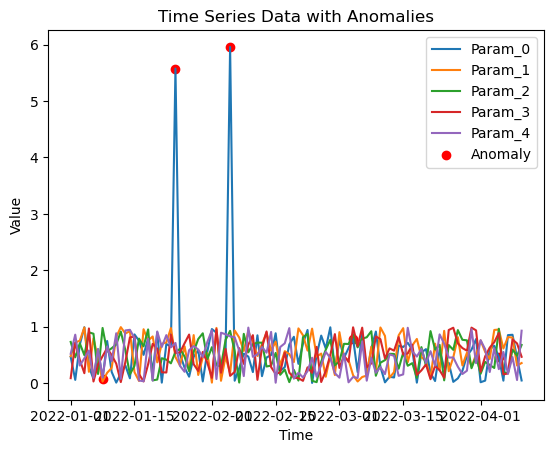

In [16]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Function to generate random synthetic time series data
def generate_time_series_data(num_samples, num_features):
    date_range = pd.date_range(start='2022-01-01', periods=num_samples, freq='D')
    data = pd.DataFrame(np.random.rand(num_samples, num_features), columns=[f"Param_{i}" for i in range(num_features)], index=date_range)
    return data

# Function to introduce anomalies in the time series data
def introduce_anomalies(data, num_anomalies):
    anomaly_indices = np.random.choice(data.index, num_anomalies, replace=False)
    data.loc[anomaly_indices, 'Param_0'] += 5  # Add anomaly value to selected rows and feature 'Param_0'
    return data

# Function to train anomaly detection model
def train_anomaly_detection_model(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    model = IsolationForest(contamination=0.05)  # Adjusting contamination parameter
    model.fit(X_scaled)
    return model, scaler

# Function to detect anomalies
def detect_anomalies(model, scaler, X):
    X_scaled = scaler.transform(X)
    anomaly_scores = model.decision_function(X_scaled)
    anomalies = X[anomaly_scores < 0]
    return anomalies, anomaly_scores

# Main function
def main():
    # Generate random synthetic time series data
    num_samples = 100
    num_features = 5
    time_series_data = generate_time_series_data(num_samples, num_features)

    # Introduce anomalies in the time series data
    time_series_data = introduce_anomalies(time_series_data, 2)  # Introduce 2 anomalies

    # Train the Isolation Forest model
    model, scaler = train_anomaly_detection_model(time_series_data)

    # Detect anomalies
    anomalies, _ = detect_anomalies(model, scaler, time_series_data)

    # Print detected anomalies
    print("Detected Anomalies:")
    print(anomalies)

    # Visualize time series data with anomalies
    for feature in time_series_data.columns:
        plt.plot(time_series_data.index, time_series_data[feature], label=feature)
    plt.scatter(anomalies.index, anomalies['Param_0'], c='red', label='Anomaly')  # Assuming 'Param_0' is the feature with anomalies
    plt.title('Time Series Data with Anomalies')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()


In [21]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Function to generate random synthetic time series data
def generate_time_series_data(num_samples, num_features):
    date_range = pd.date_range(start='2022-01-01', periods=num_samples, freq='D')
    data = pd.DataFrame(np.random.rand(num_samples, num_features), columns=[f"Param_{i}" for i in range(num_features)], index=date_range)
    return data

# Function to introduce anomalies in the time series data
def introduce_anomalies(data, num_anomalies):
    anomaly_indices = np.random.choice(data.index, num_anomalies, replace=False)
    data.loc[anomaly_indices, 'Param_0'] += 5  # Add anomaly value to selected rows and feature 'Param_0'
    return data

# Function to train anomaly detection model
def train_anomaly_detection_model(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    model = IsolationForest(contamination=0.05)  # Adjusting contamination parameter
    model.fit(X_scaled)
    return model, scaler

# Function to detect anomalies
def detect_anomalies(model, scaler, X):
    X_scaled = scaler.transform(X)
    anomaly_scores = model.decision_function(X_scaled)
    anomalies = X[anomaly_scores < 0]
    return anomalies, anomaly_scores

# Function to find root cause
def find_root_cause(anomalies, reference_data):
    root_causes = []
    for anomaly in anomalies.values:  # Iterate over anomaly values directly
        reference_diff = reference_data - anomaly.reshape(1, -1)
        param_responsible = reference_diff.abs().sum(axis=1).idxmin()
        root_causes.append(param_responsible)
    return pd.DataFrame(root_causes, columns=['Param_Responsible'])

# Main function
def main():
    # Generate random synthetic time series data
    num_samples = 100
    num_features = 5
    time_series_data = generate_time_series_data(num_samples, num_features)

    # Introduce anomalies in the time series data
    time_series_data = introduce_anomalies(time_series_data, 2)  # Introduce 2 anomalies

    # Train the Isolation Forest model
    model, scaler = train_anomaly_detection_model(time_series_data)

    # Detect anomalies
    anomalies, _ = detect_anomalies(model, scaler, time_series_data)

    # Find root cause
    root_causes = find_root_cause(anomalies, time_series_data)

    # Print detected anomalies and their root causes
    print("Detected Anomalies and Associated Root Causes:")
    for idx, anomaly in anomalies.iterrows():
        param_responsible = root_causes.iloc[idx]['Param_Responsible']
        print(f"Anomaly {idx + 1}:")
        print("Anomaly values:", anomaly.values)
        print("Parameter responsible for anomaly:", param_responsible)
        print()

    # Visualize time series data with anomalies
    for feature in time_series_data.columns:
        plt.plot(time_series_data.index, time_series_data[feature], label=feature)
    plt.scatter(anomalies.index, anomalies['Param_0'], c='red', label='Anomaly')  # Assuming 'Param_0' is the feature with anomalies
    plt.title('Time Series Data with Anomalies')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()


Detected Anomalies and Associated Root Causes:


TypeError: Cannot index by location index with a non-integer key

Detected Anomalies and Associated Root Causes:
Anomaly 1:
Anomaly values: [0.0428647  0.81448495 0.06259475 0.95983442 0.04346884]
Parameter responsible for anomaly: 2022-01-04 00:00:00

Anomaly 2:
Anomaly values: [0.02133482 0.06019207 0.89080889 0.02039263 0.0974947 ]
Parameter responsible for anomaly: 2022-02-26 00:00:00

Anomaly 3:
Anomaly values: [5.17464335 0.2995789  0.25114401 0.96127727 0.2723835 ]
Parameter responsible for anomaly: 2022-02-27 00:00:00

Anomaly 4:
Anomaly values: [5.2961784  0.76556617 0.52311879 0.13261397 0.13026826]
Parameter responsible for anomaly: 2022-03-09 00:00:00

Anomaly 5:
Anomaly values: [0.04279362 0.9424787  0.51491926 0.93511191 0.66854519]
Parameter responsible for anomaly: 2022-03-21 00:00:00



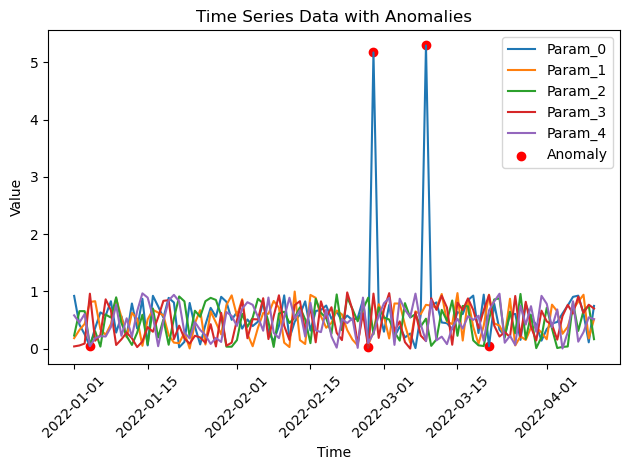

In [24]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Function to generate random synthetic time series data
def generate_time_series_data(num_samples, num_features):
    date_range = pd.date_range(start='2022-01-01', periods=num_samples, freq='D')
    data = pd.DataFrame(np.random.rand(num_samples, num_features), columns=[f"Param_{i}" for i in range(num_features)], index=date_range)
    return data

# Function to introduce anomalies in the time series data
def introduce_anomalies(data, num_anomalies):
    anomaly_indices = np.random.choice(data.index, num_anomalies, replace=False)
    data.loc[anomaly_indices, 'Param_0'] += 5  # Add anomaly value to selected rows and feature 'Param_0'
    return data

# Function to train anomaly detection model
def train_anomaly_detection_model(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    model = IsolationForest(contamination=0.05)  # Adjusting contamination parameter
    model.fit(X_scaled)
    return model, scaler

# Function to detect anomalies
def detect_anomalies(model, scaler, X):
    X_scaled = scaler.transform(X)
    anomaly_scores = model.decision_function(X_scaled)
    anomalies = X[anomaly_scores < 0]
    return anomalies, anomaly_scores

# Function to find root cause
def find_root_cause(anomalies, reference_data):
    root_causes = []
    for anomaly in anomalies.values:  # Iterate over anomaly values directly
        reference_diff = reference_data - anomaly.reshape(1, -1)
        param_responsible = reference_diff.abs().sum(axis=1).idxmin()
        root_causes.append(param_responsible)
    return pd.DataFrame(root_causes, columns=['Param_Responsible'])

# Main function
def main():
    # Generate random synthetic time series data
    num_samples = 100
    num_features = 5
    time_series_data = generate_time_series_data(num_samples, num_features)

    # Introduce anomalies in the time series data
    time_series_data = introduce_anomalies(time_series_data, 2)  # Introduce 2 anomalies

    # Train the Isolation Forest model
    model, scaler = train_anomaly_detection_model(time_series_data)

    # Detect anomalies
    anomalies, _ = detect_anomalies(model, scaler, time_series_data)

    # Find root cause
    root_causes = find_root_cause(anomalies, time_series_data)

    # Print detected anomalies and their root causes
    print("Detected Anomalies and Associated Root Causes:")
    for idx, anomaly in enumerate(anomalies.values):
        param_responsible = root_causes.iloc[idx]['Param_Responsible']
        print(f"Anomaly {idx + 1}:")
        print("Anomaly values:", anomaly)
        print("Parameter responsible for anomaly:", param_responsible)
        print()

    # Visualize time series data with anomalies
    # Visualize time series data with anomalies
    for feature in time_series_data.columns:
        plt.plot(time_series_data.index, time_series_data[feature], label=feature)
    plt.scatter(anomalies.index, anomalies['Param_0'], c='red', label='Anomaly')  # Assuming 'Param_0' is the feature with anomalies
    plt.title('Time Series Data with Anomalies')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
    plt.legend()
    plt.tight_layout()  # Adjust layout to prevent overlapping labels
    plt.show()


if __name__ == "__main__":
    main()
